In [1]:
import simtool
import matplotlib.pyplot as plt
import numpy as np

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term


### Generation des donnes

In [4]:
a1 , a2 , e , K , a = 0.088 , 0.020 , 0.96, 0.034, 0.086
params = [a1, a2, e, K, a]
param_names = ["a1", "a2", "e", "K", "a"]
t_max = 1000 #days
x0, y0 = 0.12, 0.91 #
#x0, y0 = 0.25, 0.25
state_0 = [x0, y0]
data = simtool.data_gen(params, t_max, state_0, func_rep = 'holling1')

nbpoint = 50
noise_intensity = 0.03
noise_seed = 123

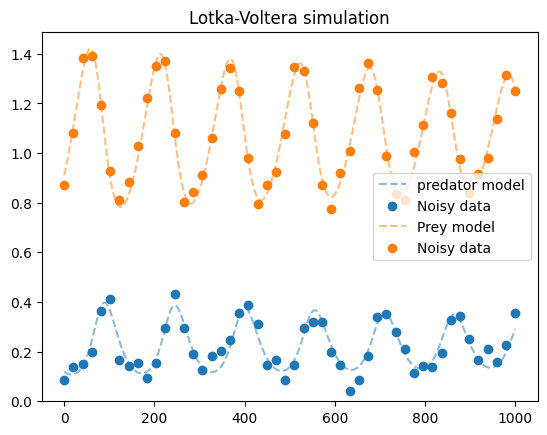

In [5]:
data.get_data(nbpoint=nbpoint, noise_intensity=noise_intensity, plot_data=True,noise_seed = noise_seed)

### Train PINN

In [6]:
model = simtool.pinn(data)
model.get_train_data()

In [7]:
#first step of the training cf l'article
bc_weights = [5,5]
data_weights = [0.1,0.1] #car données tres bruitées
pde_weights = [10,10] #car données tres bruitées

poids_p1 = [0] * 2 + bc_weights + data_weights
poids_p2 = pde_weights + bc_weights + data_weights
poids = [poids_p1,poids_p2]
pfv = 'demosimtool_train_param.dat'
lr = 1e-5

In [ ]:
model.compile_model(lr=lr,poids = poids,path_file_var = pfv,niter_p1=1000,niter_p2=500000)

Partie 1 de l'entrainement
Compiling model...
Building feed-forward neural network...
'build' took 0.045589 s

'compile' took 0.362977 s

Training model...

0         [0.00e+00, 0.00e+00, 7.20e-02, 4.14e+00, 1.45e+02, 1.74e+02]    [0.00e+00, 0.00e+00, 7.20e-02, 4.14e+00, 1.45e+02, 1.74e+02]    []  
1000      [0.00e+00, 0.00e+00, 2.13e-02, 2.50e+00, 1.06e-03, 7.86e-03]    [0.00e+00, 0.00e+00, 2.13e-02, 2.50e+00, 1.06e-03, 7.86e-03]    []  

Best model at step 1000:
  train loss: 2.53e+00
  test loss: 2.53e+00
  test metric: []

'train' took 9.990157 s

Partie 2 de l'entrainement
Compiling model...
'compile' took 0.176440 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1000      [2.81e-04, 1.47e-02, 2.13e-02, 2.50e+00, 1.06e-03, 7.86e-03]    [2.81e-04, 1.47e-02, 2.13e-02, 2.50e+00, 1.06e-03, 7.86e-03]    []  


2024-03-04 23:00:49.337830: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_7/bias/Adam_3/Assign' id:5908 op device:{requested: '', assigned: ''} def:{{{node dense_7/bias/Adam_3/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@dense_7/bias"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true](dense_7/bias/Adam_3, dense_7/bias/Adam_3/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2000      [3.41e-04, 8.28e-03, 4.80e-04, 3.14e-01, 2.14e-03, 4.69e-03]    [3.41e-04, 8.28e-03, 4.80e-04, 3.14e-01, 2.14e-03, 4.69e-03]    []  
3000      [8.63e-05, 3.72e-03, 8.89e-07, 2.17e-04, 1.46e-03, 3.42e-03]    [8.63e-05, 3.72e-03, 8.89e-07, 2.17e-04, 1.46e-03, 3.42e-03]    []  
4000      [3.30e-05, 1.08e-03, 6.68e-09, 3.43e-07, 1.06e-03, 3.34e-03]    [3.30e-05, 1.08e-03, 6.68e-09, 3.43e-07, 1.06e-03, 3.34e-03]    []  
5000      [1.83e-05, 3.53e-04, 4.22e-10, 4.91e-08, 8.73e-04, 3.30e-03]    [1.83e-05, 3.53e-04, 4.22e-10, 4.91e-08, 8.73e-04, 3.30e-03]    []  
6000      [1.59e-05, 1.48e-04, 1.06e-10, 7.16e-09, 8.32e-04, 3.27e-03]    [1.59e-05, 1.48e-04, 1.06e-10, 7.16e-09, 8.32e-04, 3.27e-03]    []  
7000      [1.23e-05, 7.62e-05, 7.82e-10, 2.86e-09, 8.22e-04, 3.22e-03]    [1.23e-05, 7.62e-05, 7.82e-10, 2.86e-09, 8.22e-04, 3.22e-03]    []  
8000      [7.95e-06, 9.73e-05, 7.39e-10, 1.15e-09, 8.91e-04, 3.19e-03]    [7.95e-06, 9.73e-05, 7.39e-10, 1.15e-09, 8.91e-04, 3.19e-03]    []  

In [ ]:
#print(model.time_last_train_in_sec)
tc_minute = model.time_last_train_in_sec//60
tc_seconde = model.time_last_train_in_sec%60
print("L'entrainement a pris "+str(int(tc_minute))+" minutes et "+str(int(tc_seconde))+" secondes")

In [ ]:
dp = simtool.displayer(model)

In [ ]:
dp.basic_plot()

In [ ]:
iter_eparam = simtool.open_datafile(pfv)

In [ ]:
a1_values = [arr[0] for arr in iter_eparam.values()]
a2_values = [arr[1] for arr in iter_eparam.values()]
e_values = [arr[2] for arr in iter_eparam.values()]
K_values = [arr[3] for arr in iter_eparam.values()]
a_values = [arr[4] for arr in iter_eparam.values()]

In [ ]:
# Print convergence
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(a1_values, label='a1_values')
plt.plot(a1*np.ones_like(a1_values),label='true value')
plt.title('Graph for a1_values')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(a2_values, label='a2_values')
plt.plot(a2*np.ones_like(a1_values),label='true value')
plt.title('Graph for a2_values')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(e_values, label='e_values')
plt.plot(e*np.ones_like(a1_values),label='true value')
plt.title('Graph for e_values')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(K_values, label='K_values')
plt.plot(K*np.ones_like(a1_values),label='true value')
plt.title('Graph for K_values')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(a_values, label='a_values')
plt.plot(a*np.ones_like(a1_values),label='true value')
plt.title('Graph for a_values')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
bestparam = iter_eparam[-1]
print(bestparam[0])
print(simtool.np.shape(bestparam))

0.0924
(7,)


## Scipy model pour comparaison

In [15]:
sp_model = simtool.model_scipy(data)

In [16]:
sp_model.get_train_data(nbpoint=nbpoint, noise_intensity=noise_intensity)

In [17]:
dsp = simtool.displayer(sp_model)

/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


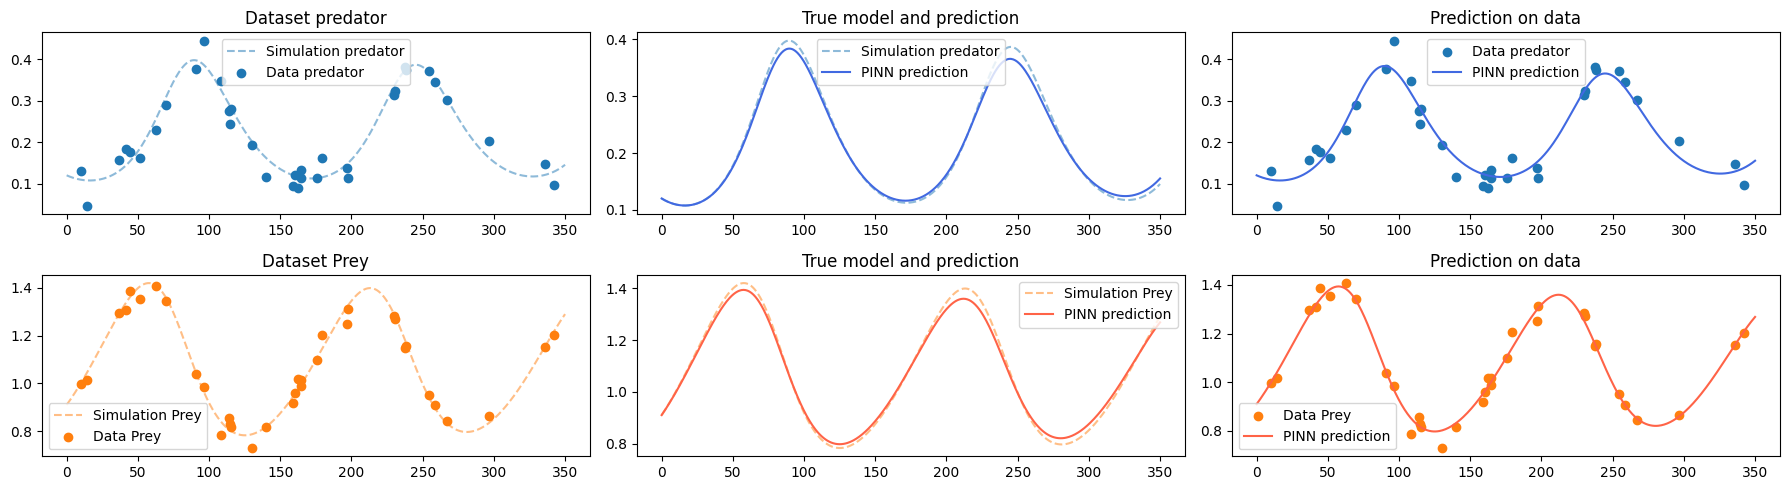

In [18]:
dsp.basic_plot()

## Affichage des résultats du PINN

In [31]:
tb = simtool.np.linspace(0,2000,10000)
bestestim = sp_model.solver_LV(state_0, tb, bestparam)
data.tmax = 2000
data.simulate()

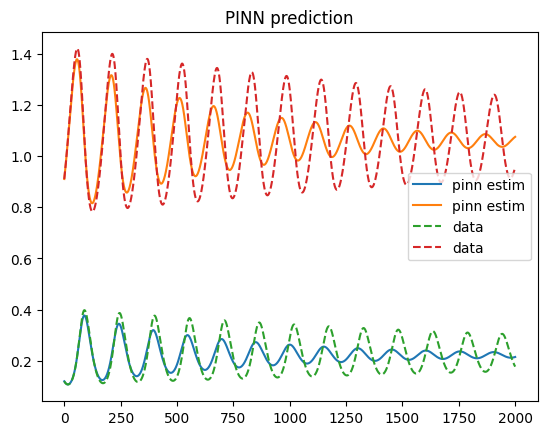

In [32]:
plt.plot(tb,bestestim,label='pinn estim')
plt.plot(data.t_simu,data.simulation,'--',label='data')
plt.legend()
plt.title('PINN prediction')
simtool.plt.show()

## Training loss evolution

IndexError: list index out of range

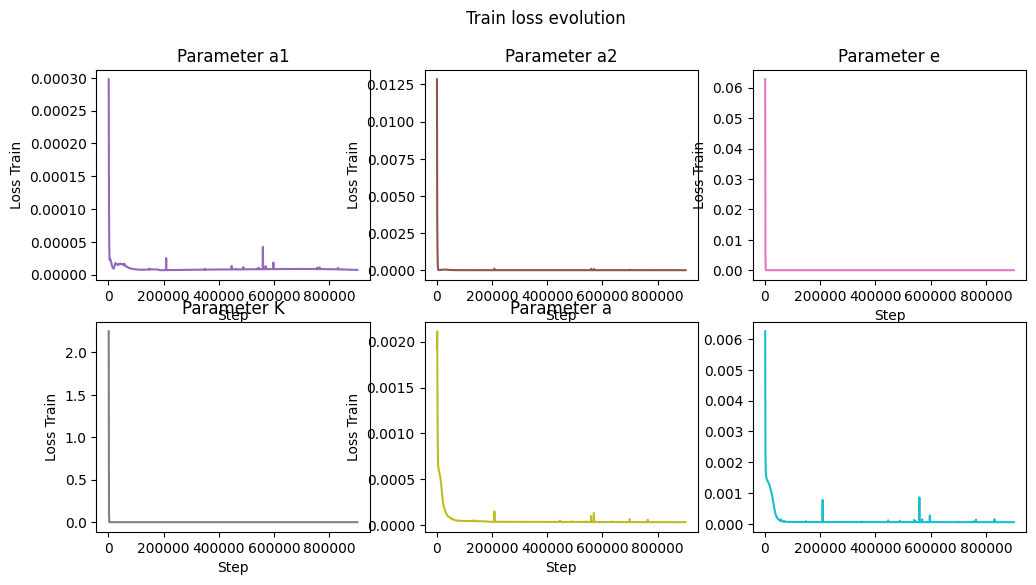

In [21]:
import matplotlib.pyplot as plt
import numpy as np

np.all(model.losshistory.loss_train) == np.all(model.losshistory.loss_test)

param_names = ["a1", "a2", "e", "K", "a"]
default_col_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Train loss evolution")
for k in range(np.shape(model.losshistory.loss_train)[1]):
    axs[int(k>2),k%3].plot(model.losshistory.steps[2:], 
                             np.array(model.losshistory.loss_train[2:])[:, k],
                             color=default_col_pal[k+4])
    axs[int(k>2),k%3].set_title("Parameter "+param_names[k])
    axs[int(k>2),k%3].set_ylabel('Loss Train')
    axs[int(k>2),k%3].set_xlabel('Step')
plt.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Test loss evolution")
for k in range(np.shape(model.losshistory.loss_test)[1]):
    axs[int(k>2),k%3].plot(model.losshistory.steps[2:], 
                             np.array(model.losshistory.loss_test[2:])[:, k],
                             color=default_col_pal[k+4])
    axs[int(k>2),k%3].set_title("Parameter "+param_names[k])
    axs[int(k>2),k%3].set_ylabel('Loss Test')
    axs[int(k>2),k%3].set_xlabel('Step')
plt.tight_layout()

## GIF on training

In [22]:
from scipy.integrate import odeint

t_max_hist = t_max
state0_hist = state_0

def lv_model_holling1_hist(state, t, param_lv_hol1):
    a1, a2, e, c, K, a = param_lv_hol1
    x1, x2 = state
    # HOLLING 1
    frep_predateur = a * x2
    dx1_dt = -a1*x1 + e*c*x1*frep_predateur
    dx2_dt = a2*x2*(1-K*x2) - x1*frep_predateur
    return np.array([dx1_dt, dx2_dt])
    
def simulate(state0_hist, t_max_hist, param_lv_hol1, nb_p_t=15000):
    t_simu = np.linspace(0, t_max_hist, nb_p_t)
    simulation = odeint(lv_model_holling1_hist, state0_hist, t_simu, args=(param_lv_hol1,), atol=1e-8, rtol=1e-11)
    return t_simu, simulation

In [23]:
import numpy as np
import re

file_path = pfv
param_names_hist = ["a1", "a2", "e", "c", "K", "a", "S", "b"]

steps_hist, param_hist = [], []
with open(file_path, 'r') as file:
    for line in file:
        steps_hist.append(int(line.split(' ')[0]))
        param_hist.append(
            [float(value) for value in 
             re.search(r'\[(.*?)\]', line).group(1).split(', ')]
        )
steps_hist = np.array(steps_hist)
param_hist = np.array(param_hist)

# print(steps_hist)
# print(param_hist)
print(np.shape(param_hist))
# print(param_hist[3, :6])

all_t_simu, all_simulations = [], []
for k in range(np.shape(param_hist)[0]):
    param_lv_hol1 = param_hist[k, :6]
    t_simu, simulation = simulate(state0_hist, t_max_hist, param_lv_hol1, nb_p_t=15000)
    all_t_simu.append(t_simu)
    all_simulations.append(simulation)


(901, 7)


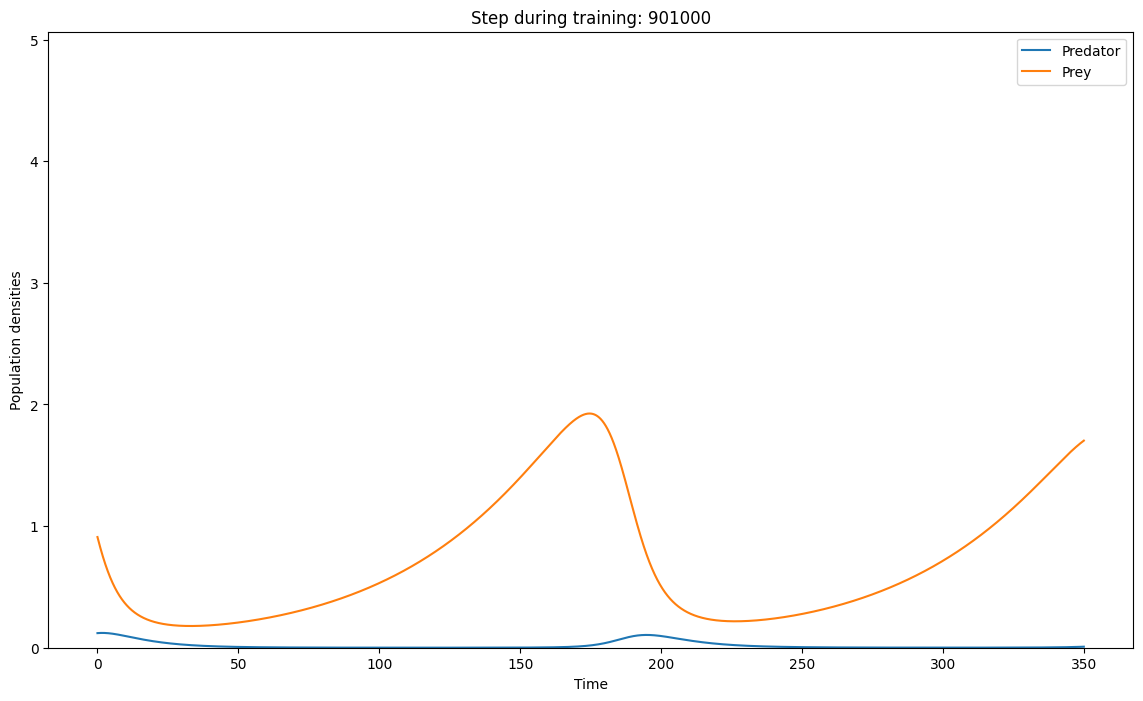

In [24]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

all_t_simu_with_rep = [all_t_simu[0]]*10 + all_t_simu + [all_t_simu[-1]]*20
all_simulations_with_rep = [all_simulations[0]]*10 + all_simulations + [all_simulations[-1]]*20
steps_hist_with_rep = [steps_hist[0]]*10 + list(steps_hist) + [steps_hist[-1]]*20
global_y_max = max([np.max(sim) for sim in all_simulations])

fig, ax = plt.subplots(figsize=(14, 8))
def update(frame):
    ax.clear()  # Clear the previous plot
    t_simu = all_t_simu_with_rep[frame]
    simulation = all_simulations_with_rep[frame]
    ax.plot(t_simu, simulation, label=["Predator", "Prey"])
    ax.set_xlabel('Time')
    ax.set_ylabel('Population densities')
    ax.set_ylim((0, global_y_max*1.05))
    ax.legend(loc='upper right')
    ax.set_title(f'Step during training: {steps_hist_with_rep[frame]}')

animation = FuncAnimation(fig, update, frames=len(all_t_simu_with_rep), interval=100)  # 50 milliseconds between frames
animation.save('evolution_animation.gif', writer='pillow', fps=1/0.1)  # 0.1 seconds per frame

plt.show()
